In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.optimize import minimize, Bounds
import random as rdm
from pybacktestchain.data_module import get_stocks_data, get_stock_data, UNIVERSE_SEC

In [40]:
def generate_random_ticker(n):
    res=[]
    for i in range(n):
        res.append(rdm.choice(UNIVERSE_SEC))
    return res

In [41]:
N=4
tickers=generate_random_ticker(N)
tickers

['NTLA', 'TTE', 'VIASP', 'ABOS']

In [42]:
get_stocks_data(tickers,'2010-01-01',"2025-01-01").groupby(['Date','ticker'])['Close'].sum().unstack('ticker').tail()

ticker,ABOS,NTLA,TTE,VIASP
Date,,,,
2024-12-24 00:00:00-05:00,1.79,12.05,54.320000,23.400000
2024-12-26 00:00:00-05:00,1.89,12.12,54.380001,23.620001
2024-12-27 00:00:00-05:00,1.78,11.97,54.520000,23.580000
2024-12-30 00:00:00-05:00,1.75,11.41,54.480000,23.590000
2024-12-31 00:00:00-05:00,1.72,11.66,54.500000,23.049999


In [43]:
get_stocks_data(tickers,'2010-01-01',"2025-01-01").groupby(['Date','ticker'])['Close'].sum().unstack('ticker').tail()

ticker,ABOS,NTLA,TTE,VIASP
Date,,,,
2024-12-24 00:00:00-05:00,1.79,12.05,54.320000,23.400000
2024-12-26 00:00:00-05:00,1.89,12.12,54.380001,23.620001
2024-12-27 00:00:00-05:00,1.78,11.97,54.520000,23.580000
2024-12-30 00:00:00-05:00,1.75,11.41,54.480000,23.590000
2024-12-31 00:00:00-05:00,1.72,11.66,54.500000,23.049999


In [44]:
data=get_stocks_data(tickers,'2023-11-15',"2025-01-16").groupby(['Date','ticker'])['Close'].sum().unstack('ticker')
data

ticker,ABOS,NTLA,TTE,VIASP
Date,,,,
2023-11-15 00:00:00-05:00,2.37,26.580000,67.349998,20.010000
2023-11-16 00:00:00-05:00,2.24,26.020000,66.430000,19.760000
2023-11-17 00:00:00-05:00,2.28,28.120001,67.410004,19.799999
2023-11-20 00:00:00-05:00,2.36,30.280001,68.610001,19.990000
2023-11-21 00:00:00-05:00,2.34,28.459999,68.949997,19.962000
...,...,...,...,...
2025-01-08 00:00:00-05:00,1.70,12.020000,56.790001,22.888000
2025-01-10 00:00:00-05:00,1.65,10.200000,56.680000,22.620001
2025-01-13 00:00:00-05:00,1.59,10.050000,56.810001,22.775000


In [45]:
#data = pd.read_csv('data.csv')
# data without header, and with index named "Date"

#data_fx=pd.read_csv('data_fx.csv')
#same config as data

data=data.dropna(axis=0)
#data=data.join(data_fx,how='left')

data=data.ffill()
data.index=pd.to_datetime(data.index)

In [46]:
get_stock_data("SOFR",'2023-11-15',"2025-01-01")

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2023-11-15 00:00:00-05:00,100.040001,100.040001,100.040001,100.040001,94.628677,495200,SOFR
1,2023-11-16 00:00:00-05:00,100.099998,100.099998,100.099998,100.099998,94.685455,100,SOFR
2,2023-11-17 00:00:00-05:00,100.150002,100.160004,100.135002,100.135002,94.718544,500,SOFR
3,2023-11-20 00:00:00-05:00,100.169998,100.169998,100.139999,100.139999,94.723267,200,SOFR
4,2023-11-21 00:00:00-05:00,100.139999,100.180000,100.139999,100.180000,94.761108,200,SOFR
...,...,...,...,...,...,...,...,...
278,2024-12-24 00:00:00-05:00,100.510002,100.514999,100.489998,100.514999,100.128197,1200,SOFR
279,2024-12-26 00:00:00-05:00,100.525002,100.570000,100.525002,100.567001,100.180000,3700,SOFR
280,2024-12-27 00:00:00-05:00,100.180000,100.190002,100.169998,100.190002,100.190002,8500,SOFR
281,2024-12-30 00:00:00-05:00,100.180000,100.190002,100.180000,100.190002,100.190002,1300,SOFR


In [47]:
data.index

DatetimeIndex(['2023-11-15 00:00:00-05:00', '2023-11-16 00:00:00-05:00',
               '2023-11-17 00:00:00-05:00', '2023-11-20 00:00:00-05:00',
               '2023-11-21 00:00:00-05:00', '2023-11-22 00:00:00-05:00',
               '2023-11-24 00:00:00-05:00', '2023-11-27 00:00:00-05:00',
               '2023-11-28 00:00:00-05:00', '2023-11-29 00:00:00-05:00',
               ...
               '2024-12-31 00:00:00-05:00', '2025-01-02 00:00:00-05:00',
               '2025-01-03 00:00:00-05:00', '2025-01-06 00:00:00-05:00',
               '2025-01-07 00:00:00-05:00', '2025-01-08 00:00:00-05:00',
               '2025-01-10 00:00:00-05:00', '2025-01-13 00:00:00-05:00',
               '2025-01-14 00:00:00-05:00', '2025-01-15 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=292, freq=None)

In [48]:
rate = get_stock_data("SOFR",'2023-11-15',"2025-01-16")
rate.index=pd.to_datetime(rate.Date)
rate=rate.reindex(data.index.to_list()).ffill()
rate=rate[["Close"]]
rate

,Close
Date,
2023-11-15 00:00:00-05:00,100.040001
2023-11-16 00:00:00-05:00,100.099998
2023-11-17 00:00:00-05:00,100.135002
2023-11-20 00:00:00-05:00,100.139999
2023-11-21 00:00:00-05:00,100.180000
...,...
2025-01-08 00:00:00-05:00,100.310997
2025-01-10 00:00:00-05:00,100.345001
2025-01-13 00:00:00-05:00,100.355003


In [49]:
VT=0.1
min_w=0
max_w=0.5

In [50]:
# N = number of underlyings
COV_mat=np.zeros((N,N,data.shape[0]),dtype=float) # covariance matrix

Weights=np.zeros((N,data.shape[0]))

In [51]:
#date=
t_start=252//4
IL_vect=np.zeros((data.shape[0]))
IL_vect[:t_start+22]=100
Exp_vect=np.zeros((data.shape[0]))
Exp_vect[:t_start+22]=1.2
Basket_vect=np.zeros((data.shape[0]))
Basket_vect[:t_start+1]=100
HV_vect=np.zeros((data.shape[0]))
t_rebal=np.zeros((data.shape[0]))

Price_vect=np.zeros((N,data.shape[0]))
for i in range(N):
    Price_vect[i]=data.iloc[:,[i]].values.ravel()

In [52]:
DCF=pd.Series(((pd.DataFrame(data.index)-pd.DataFrame(data.index).shift(1)).iloc[:,0].dt.days).values)

In [53]:
return_mat=np.log(data/data.shift(1)).multiply(np.sqrt(252/DCF).values,axis=0)
return_mat

ticker,ABOS,NTLA,TTE,VIASP
Date,,,,
2023-11-15 00:00:00-05:00,NaN,NaN,NaN,NaN
2023-11-16 00:00:00-05:00,-0.895545,-0.338025,-0.218340,-0.199582
2023-11-17 00:00:00-05:00,0.280972,1.232110,0.232477,0.032101
2023-11-20 00:00:00-05:00,0.316071,0.678279,0.161718,0.087529
2023-11-21 00:00:00-05:00,-0.135103,-0.984027,0.078472,-0.022251
...,...,...,...,...
2025-01-08 00:00:00-05:00,-1.169756,-0.583449,-0.061377,0.137925
2025-01-10 00:00:00-05:00,-0.335099,-1.842964,-0.021764,-0.132211
2025-01-13 00:00:00-05:00,-0.339489,-0.135782,0.020997,0.062588


In [54]:
rate

,Close
Date,
2023-11-15 00:00:00-05:00,100.040001
2023-11-16 00:00:00-05:00,100.099998
2023-11-17 00:00:00-05:00,100.135002
2023-11-20 00:00:00-05:00,100.139999
2023-11-21 00:00:00-05:00,100.180000
...,...
2025-01-08 00:00:00-05:00,100.310997
2025-01-10 00:00:00-05:00,100.345001
2025-01-13 00:00:00-05:00,100.355003


In [55]:
def IL(t):
    return IL_vect[t-1]*(1+Exp_vect[t-1]*(Basket_vect[t]/Basket_vect[t-1]-1-rate.iloc[t-1]["Close"]/10000*DCF[t]))

def BL(t):
    print(np.sum([Weights[i,t]*(data.iloc[t,i]/data.shift(1).iloc[t,i]) for i in range(N)]))
    return Basket_vect[t-1]*np.sum([Weights[i,t]*(data.iloc[t,i]/data.shift(1).iloc[t,i]) for i in range(N)])

def HV(t):
    return np.sqrt(252*np.mean([np.log(Basket_vect[h]/Basket_vect[h-1])**2 for h in range(t-20,t)]))

def expo(t):
    return min(VT/HV(t-2),1.2)

def covar():
    return return_mat.cov()

In [56]:
COV_mat=covar()

In [57]:
def fun_opt(W,R):
    return (-1)*np.dot(W,R)

def contrainte(W,cov):
    return VT - np.sqrt(np.dot(np.dot(W.T,cov),W))

In [58]:
x0=np.array([1/N for i in range(N)])
a=1
b=2
def W(t):
    cons=({'type':'ineq','fun':lambda W:1 -  np.sum([W[i] for i in range(a)])},
          {'type':'ineq','fun':lambda W:1 -  np.sum([W[i] for i in range(a,b)])},
          {'type':'ineq','fun':lambda W:1 -  np.sum([W[i] for i in range(b,N)])},
         # {'type':'ineq','fun':contrainte, 'args': COV_mat[:,:,t]},
          {'type':'eq','fun':lambda W : np.sum(W)-1},
          )
    bonds=Bounds(lb=np.array([min_w for i in range(N)]),ub=np.array([max_w for i in range(N)]))
    res=minimize(fun_opt,x0, bounds=bonds, args=return_mat.to_numpy()[t,:], constraints=cons)
    return res.x

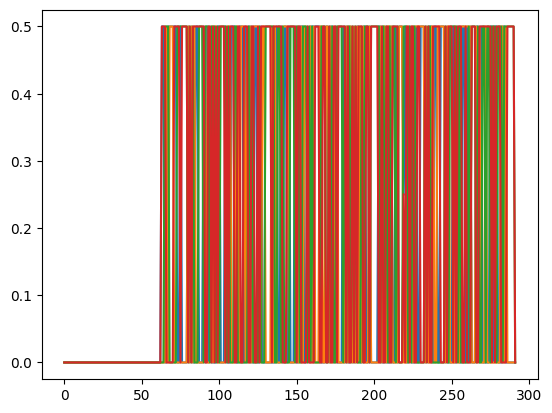

In [59]:
for t in range(252//4,return_mat.shape[0]-1):
    Weights[:,t]=W(t)
    
plt.plot(Weights.T)

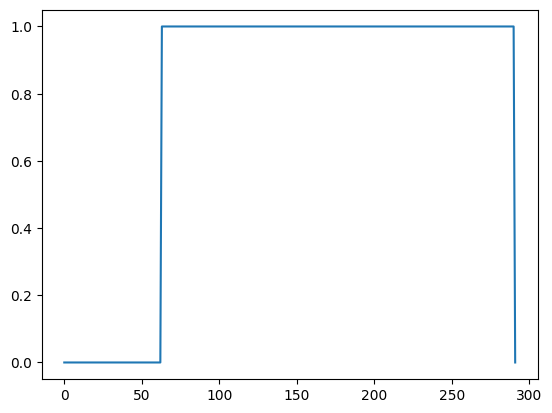

In [60]:
plt.plot(Weights.sum(axis=0))

In [61]:
for t in range(t_start,return_mat.shape[0]-1):
    Basket_vect[t]=BL(t)

for t in range(t_start+20,t_start+23):
    HV_vect[t]=HV(t)
    
for t in range(t_start+22,return_mat.shape[0]-1):
    Exp_vect[t]=expo(t)
    IL_vect[t]=IL(t)

1.029009473351076
0.9992590432265597
1.0118935658059514
1.0059704788901103
1.0358184738638267
1.041121024810576
1.119803480016747
1.0409761469405412
1.019192975521369
1.0510557929626176
0.9981632315119346
0.9934838772728498
1.0199106553496984
1.008447653323502
1.0027308021581125
1.0051635329960353
1.003062558519325
1.0439313315704255
1.0003640029320784
1.0251738941517357
1.003703694284698
1.0096516747446562
1.0270024426561664
1.0195377250841788
0.9955593258861138
1.0066950710645355
0.9998682437685156
1.079326987676323
1.012063579907625
1.0016721939539173
1.0015553017440109
1.0356280736455938
1.0022929144113606
1.0104695362258846
1.0159814987611389
1.0154150337977663
0.9853322904797882
1.0479841741909766
1.0064857067539825
0.9746249627508743
0.9933966077878778
0.9957142898014615
0.9946600982811598
1.0144752178625152
1.0104242064606188
1.0121769456461989
1.007460088408759
1.0085148754557982
1.0239730212144253
1.0339988052511906
1.0045108545425938
1.0303593245596152
1.052495739602635
1.00

In [62]:
IL_vect*100/IL_vect[t_start]

array([100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.  

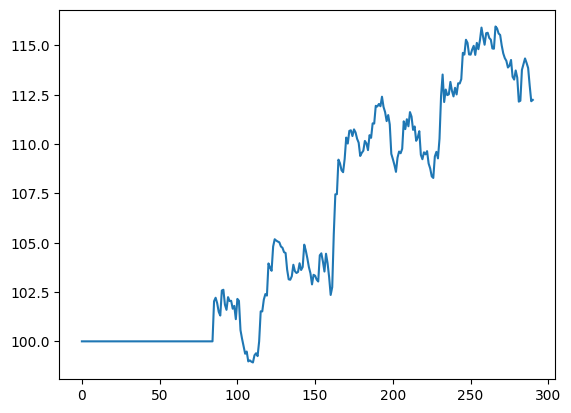

In [63]:
results=IL_vect*100/IL_vect[t_start]
plt.plot(results[:-1])